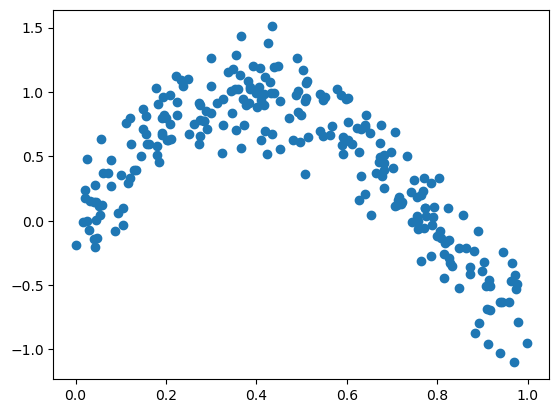

In [182]:
#per ogni y ho una funzione polinomiale => matrice

import numpy as np
import matplotlib.pyplot as plt

X = np.array([np.random.uniform(0, 1, size=250)]).transpose()
Y = np.sin(X*4) + np.array([np.random.normal(0, 0.2, 250)]).transpose()

plt.scatter(X, Y)
plt.show()

In [183]:
features = np.array([lambda _ : 1, lambda x : x, lambda x : x**2, lambda x : x**3, lambda x : x**4, lambda x : x**5, lambda x : x**6])
weights = np.zeros((len(features), 1), dtype='float')
epochs = 100000
lmbd = 0.01

In [184]:
phi = np.array([[f(x) for f in features] for [x] in X], dtype='float')
phi_norm_factor = np.sqrt(np.square(phi).sum(axis=0, dtype='float'))
normalized_phi = (phi / phi_norm_factor)

for _ in range(epochs):
    for i in range(len(features)):
        pred = np.matmul(np.delete(normalized_phi, i, 1), np.delete(weights, i, 0), dtype='float')
        err = Y - pred
        roh_j = np.matmul(normalized_phi.transpose()[i], err, dtype='float').sum(axis=0, dtype='float') 

        if(roh_j < -(lmbd/2)):
            weights[i] = roh_j + lmbd/2
        elif(roh_j > lmbd/2):
            weights[i] = roh_j - lmbd/2
        else:
            weights[i] = 0

weights = (weights.transpose() / phi_norm_factor).transpose()

print(weights)

[[-0.02573577]
 [ 4.55900045]
 [-3.65704868]
 [-3.71650614]
 [ 0.        ]
 [ 0.        ]
 [ 2.10475255]]


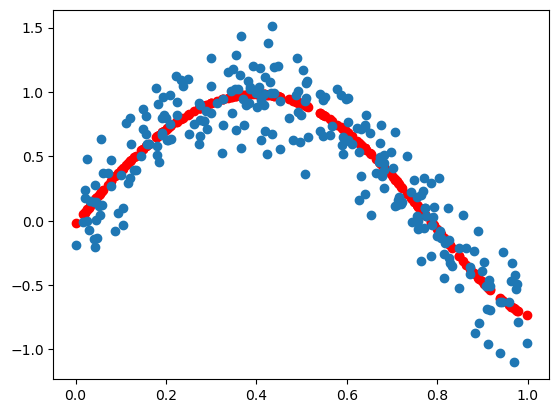

In [185]:

pred = np.matmul(phi, weights, dtype='float').sum(axis=1, dtype='float')
plt.scatter(X, pred, color="red")
plt.scatter(X, Y)